In [13]:
# Cell 1: Import libraries and setup
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime, timedelta
import warnings
warnings.filterwarnings('ignore')

# Display settings
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', 100)
pd.set_option('display.width', None)

# Plotting style
sns.set_style("whitegrid")
plt.rcParams['figure.figsize'] = (12, 6)

print("✅ Libraries imported successfully")
print(f"Pandas version: {pd.__version__}")
print(f"NumPy version: {np.__version__}")


✅ Libraries imported successfully
Pandas version: 2.3.3
NumPy version: 2.3.5


In [12]:
# Cell 2: Load MIMIC-III demo CSV files
DATA_PATH = "/mnt/d/Datasets/mimic-iii-demo/mimic-iii-clinical-database-demo-1.4/"

print("📂 Loading MIMIC-III Demo Dataset...")
print(f"Data path: {DATA_PATH}\n")

# Load core tables with exact column names (lowercase as per your schema)
try:
    # Note: Your PATIENTS.csv seems to have prescription data
    # Let's load the actual PATIENTS table (might be named differently)
    patients = pd.read_csv(DATA_PATH + "PATIENTS.csv")
    admissions = pd.read_csv(DATA_PATH + "ADMISSIONS.csv")
    diagnoses = pd.read_csv(DATA_PATH + "DIAGNOSES_ICD.csv")
    icustays = pd.read_csv(DATA_PATH + "ICUSTAYS.csv")
    procedures = pd.read_csv(DATA_PATH + "PROCEDURES_ICD.csv")
    
    print("✅ Successfully loaded all tables:")
    print(f"   - PATIENTS: {patients.shape[0]} rows × {patients.shape[1]} columns")
    print(f"   - ADMISSIONS: {admissions.shape[0]} rows × {admissions.shape[1]} columns")
    print(f"   - DIAGNOSES_ICD: {diagnoses.shape[0]} rows × {diagnoses.shape[1]} columns")
    print(f"   - ICUSTAYS: {icustays.shape[0]} rows × {icustays.shape[1]} columns")
    print(f"   - PROCEDURES_ICD: {procedures.shape[0]} rows × {procedures.shape[1]} columns")
    
    print("\n📋 Actual columns in each table:")
    print(f"\n   PATIENTS columns: {list(patients.columns)}")
    print(f"\n   ADMISSIONS columns: {list(admissions.columns)}")
    print(f"\n   DIAGNOSES_ICD columns: {list(diagnoses.columns)}")
    print(f"\n   ICUSTAYS columns: {list(icustays.columns)}")
    print(f"\n   PROCEDURES_ICD columns: {list(procedures.columns)}")
    
except FileNotFoundError as e:
    print(f"❌ Error: {e}")
    print("Check that dataset is extracted correctly")


📂 Loading MIMIC-III Demo Dataset...
Data path: /mnt/d/Datasets/mimic-iii-demo/mimic-iii-clinical-database-demo-1.4/

✅ Successfully loaded all tables:
   - PATIENTS: 100 rows × 8 columns
   - ADMISSIONS: 129 rows × 19 columns
   - DIAGNOSES_ICD: 1761 rows × 5 columns
   - ICUSTAYS: 136 rows × 12 columns
   - PROCEDURES_ICD: 506 rows × 5 columns

📋 Actual columns in each table:

   PATIENTS columns: ['row_id', 'subject_id', 'gender', 'dob', 'dod', 'dod_hosp', 'dod_ssn', 'expire_flag']

   ADMISSIONS columns: ['row_id', 'subject_id', 'hadm_id', 'admittime', 'dischtime', 'deathtime', 'admission_type', 'admission_location', 'discharge_location', 'insurance', 'language', 'religion', 'marital_status', 'ethnicity', 'edregtime', 'edouttime', 'diagnosis', 'hospital_expire_flag', 'has_chartevents_data']

   DIAGNOSES_ICD columns: ['row_id', 'subject_id', 'hadm_id', 'seq_num', 'icd9_code']

   ICUSTAYS columns: ['row_id', 'subject_id', 'hadm_id', 'icustay_id', 'dbsource', 'first_careunit', 'last_

In [11]:
# Cell 2.5: Verify actual column names in all tables
import os

DATA_PATH = "/mnt/d/Datasets/mimic-iii-demo/mimic-iii-clinical-database-demo-1.4/"

print("🔍 VERIFYING ACTUAL COLUMN NAMES IN DATASET\n")
print("=" * 80)

tables = {
    'PATIENTS': 'PATIENTS.csv',
    'ADMISSIONS': 'ADMISSIONS.csv', 
    'DIAGNOSES_ICD': 'DIAGNOSES_ICD.csv',
    'ICUSTAYS': 'ICUSTAYS.csv',
    'PROCEDURES_ICD': 'PROCEDURES_ICD.csv'
}

for table_name, filename in tables.items():
    filepath = DATA_PATH + filename
    if os.path.exists(filepath):
        df = pd.read_csv(filepath, nrows=0)  # Load only headers
        print(f"\n📋 {table_name}:")
        print(f"   Columns: {list(df.columns)}")
    else:
        print(f"\n❌ {table_name}: File not found")

print("\n" + "=" * 80)


🔍 VERIFYING ACTUAL COLUMN NAMES IN DATASET


📋 PATIENTS:
   Columns: ['row_id', 'subject_id', 'gender', 'dob', 'dod', 'dod_hosp', 'dod_ssn', 'expire_flag']

📋 ADMISSIONS:
   Columns: ['row_id', 'subject_id', 'hadm_id', 'admittime', 'dischtime', 'deathtime', 'admission_type', 'admission_location', 'discharge_location', 'insurance', 'language', 'religion', 'marital_status', 'ethnicity', 'edregtime', 'edouttime', 'diagnosis', 'hospital_expire_flag', 'has_chartevents_data']

📋 DIAGNOSES_ICD:
   Columns: ['row_id', 'subject_id', 'hadm_id', 'seq_num', 'icd9_code']

📋 ICUSTAYS:
   Columns: ['row_id', 'subject_id', 'hadm_id', 'icustay_id', 'dbsource', 'first_careunit', 'last_careunit', 'first_wardid', 'last_wardid', 'intime', 'outtime', 'los']

📋 PROCEDURES_ICD:
   Columns: ['row_id', 'subject_id', 'hadm_id', 'seq_num', 'icd9_code']



In [14]:
# Cell 2: Load MIMIC-III demo CSV files
DATA_PATH = "/mnt/d/Datasets/mimic-iii-demo/mimic-iii-clinical-database-demo-1.4/"

print("📂 Loading MIMIC-III Demo Dataset...")
print(f"Data path: {DATA_PATH}\n")

# Load core tables with exact column names (lowercase as per your schema)
try:
    # Note: Your PATIENTS.csv seems to have prescription data
    # Let's load the actual PATIENTS table (might be named differently)
    patients = pd.read_csv(DATA_PATH + "PATIENTS.csv")
    admissions = pd.read_csv(DATA_PATH + "ADMISSIONS.csv")
    diagnoses = pd.read_csv(DATA_PATH + "DIAGNOSES_ICD.csv")
    icustays = pd.read_csv(DATA_PATH + "ICUSTAYS.csv")
    procedures = pd.read_csv(DATA_PATH + "PROCEDURES_ICD.csv")
    
    print("✅ Successfully loaded all tables:")
    print(f"   - PATIENTS: {patients.shape[0]} rows × {patients.shape[1]} columns")
    print(f"   - ADMISSIONS: {admissions.shape[0]} rows × {admissions.shape[1]} columns")
    print(f"   - DIAGNOSES_ICD: {diagnoses.shape[0]} rows × {diagnoses.shape[1]} columns")
    print(f"   - ICUSTAYS: {icustays.shape[0]} rows × {icustays.shape[1]} columns")
    print(f"   - PROCEDURES_ICD: {procedures.shape[0]} rows × {procedures.shape[1]} columns")
    
    print("\n📋 Actual columns in each table:")
    print(f"\n   PATIENTS columns: {list(patients.columns)}")
    print(f"\n   ADMISSIONS columns: {list(admissions.columns)}")
    print(f"\n   DIAGNOSES_ICD columns: {list(diagnoses.columns)}")
    print(f"\n   ICUSTAYS columns: {list(icustays.columns)}")
    print(f"\n   PROCEDURES_ICD columns: {list(procedures.columns)}")
    
except FileNotFoundError as e:
    print(f"❌ Error: {e}")
    print("Check that dataset is extracted correctly")


📂 Loading MIMIC-III Demo Dataset...
Data path: /mnt/d/Datasets/mimic-iii-demo/mimic-iii-clinical-database-demo-1.4/

✅ Successfully loaded all tables:
   - PATIENTS: 100 rows × 8 columns
   - ADMISSIONS: 129 rows × 19 columns
   - DIAGNOSES_ICD: 1761 rows × 5 columns
   - ICUSTAYS: 136 rows × 12 columns
   - PROCEDURES_ICD: 506 rows × 5 columns

📋 Actual columns in each table:

   PATIENTS columns: ['row_id', 'subject_id', 'gender', 'dob', 'dod', 'dod_hosp', 'dod_ssn', 'expire_flag']

   ADMISSIONS columns: ['row_id', 'subject_id', 'hadm_id', 'admittime', 'dischtime', 'deathtime', 'admission_type', 'admission_location', 'discharge_location', 'insurance', 'language', 'religion', 'marital_status', 'ethnicity', 'edregtime', 'edouttime', 'diagnosis', 'hospital_expire_flag', 'has_chartevents_data']

   DIAGNOSES_ICD columns: ['row_id', 'subject_id', 'hadm_id', 'seq_num', 'icd9_code']

   ICUSTAYS columns: ['row_id', 'subject_id', 'hadm_id', 'icustay_id', 'dbsource', 'first_careunit', 'last_

In [15]:
# Cell 3: Explore ADMISSIONS table (PRIMARY TABLE for demographics)
print("=" * 80)
print("🏥 ADMISSIONS TABLE ANALYSIS")
print("=" * 80)

print("\n1️⃣ First 5 rows:")
print(admissions.head())

print("\n2️⃣ Data types:")
print(admissions.dtypes)

print("\n3️⃣ Missing values:")
print(admissions.isnull().sum())

print("\n4️⃣ Unique patients:")
print(f"   Total admissions: {len(admissions)}")
print(f"   Unique patients (subject_id): {admissions['subject_id'].nunique()}")

print("\n5️⃣ Admission types:")
print(admissions['admission_type'].value_counts())

print("\n6️⃣ Insurance types:")
print(admissions['insurance'].value_counts())

print("\n7️⃣ Admission locations:")
print(admissions['admission_location'].value_counts().head(10))

print("\n8️⃣ Patients with multiple admissions:")
multi_admits = admissions.groupby('subject_id').size()
print(f"   - Single admission: {(multi_admits == 1).sum()} patients")
print(f"   - 2+ admissions: {(multi_admits > 1).sum()} patients")
print(f"   - Max admissions per patient: {multi_admits.max()}")

print("\n9️⃣ Hospital mortality:")
print(f"   Died in hospital: {admissions['hospital_expire_flag'].sum()} admissions")
print(f"   Mortality rate: {admissions['hospital_expire_flag'].mean() * 100:.1f}%")


🏥 ADMISSIONS TABLE ANALYSIS

1️⃣ First 5 rows:
   row_id  subject_id  hadm_id            admittime            dischtime  \
0   12258       10006   142345  2164-10-23 21:09:00  2164-11-01 17:15:00   
1   12263       10011   105331  2126-08-14 22:32:00  2126-08-28 18:59:00   
2   12265       10013   165520  2125-10-04 23:36:00  2125-10-07 15:13:00   
3   12269       10017   199207  2149-05-26 17:19:00  2149-06-03 18:42:00   
4   12270       10019   177759  2163-05-14 20:43:00  2163-05-15 12:00:00   

             deathtime admission_type         admission_location  \
0                  NaN      EMERGENCY       EMERGENCY ROOM ADMIT   
1  2126-08-28 18:59:00      EMERGENCY  TRANSFER FROM HOSP/EXTRAM   
2  2125-10-07 15:13:00      EMERGENCY  TRANSFER FROM HOSP/EXTRAM   
3                  NaN      EMERGENCY       EMERGENCY ROOM ADMIT   
4  2163-05-15 12:00:00      EMERGENCY  TRANSFER FROM HOSP/EXTRAM   

  discharge_location insurance language  religion marital_status  \
0   HOME HEALTH CAR

📏 LENGTH OF STAY ANALYSIS

1️⃣ LOS Statistics:
count    129.000000
mean       9.332332
std       12.720450
min        0.038194
25%        3.314583
50%        6.634028
75%       10.645139
max      123.984722
Name: los_days, dtype: float64

2️⃣ LOS Distribution:


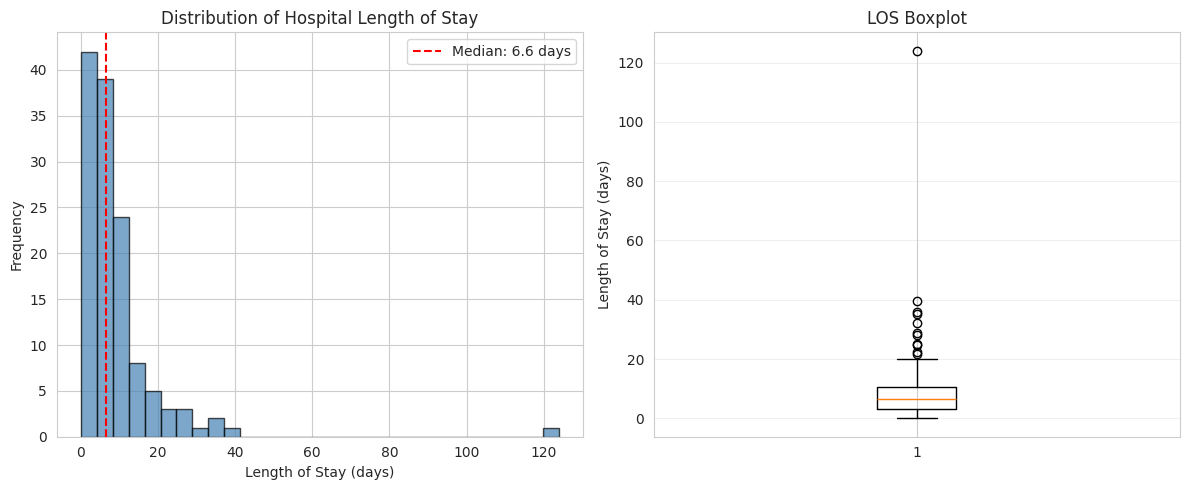


3️⃣ Long stays (>14 days):
   Count: 17 admissions (13.2%)


In [16]:
# Cell 4: Calculate Length of Stay (LOS)
print("=" * 80)
print("📏 LENGTH OF STAY ANALYSIS")
print("=" * 80)

# Convert datetime columns (lowercase column names)
admissions['admittime'] = pd.to_datetime(admissions['admittime'])
admissions['dischtime'] = pd.to_datetime(admissions['dischtime'])

# Calculate LOS in days
admissions['los_days'] = (admissions['dischtime'] - admissions['admittime']).dt.total_seconds() / 86400

print("\n1️⃣ LOS Statistics:")
print(admissions['los_days'].describe())

print("\n2️⃣ LOS Distribution:")
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.hist(admissions['los_days'], bins=30, edgecolor='black', alpha=0.7, color='steelblue')
plt.xlabel('Length of Stay (days)')
plt.ylabel('Frequency')
plt.title('Distribution of Hospital Length of Stay')
plt.axvline(admissions['los_days'].median(), color='red', linestyle='--', 
            label=f'Median: {admissions["los_days"].median():.1f} days')
plt.legend()

plt.subplot(1, 2, 2)
plt.boxplot(admissions['los_days'])
plt.ylabel('Length of Stay (days)')
plt.title('LOS Boxplot')
plt.grid(axis='y', alpha=0.3)

plt.tight_layout()
plt.show()

print("\n3️⃣ Long stays (>14 days):")
long_stays = admissions[admissions['los_days'] > 14]
print(f"   Count: {len(long_stays)} admissions ({len(long_stays)/len(admissions)*100:.1f}%)")


In [17]:
# Cell 5: Calculate 30-day readmissions (TARGET VARIABLE)
print("=" * 80)
print("🎯 30-DAY READMISSION ANALYSIS (TARGET VARIABLE)")
print("=" * 80)

# Sort by patient and admission time (lowercase columns)
admissions_sorted = admissions.sort_values(['subject_id', 'admittime']).reset_index(drop=True)

# Calculate days until next admission
admissions_sorted['next_admittime'] = admissions_sorted.groupby('subject_id')['admittime'].shift(-1)
admissions_sorted['days_to_next_admit'] = (
    admissions_sorted['next_admittime'] - admissions_sorted['dischtime']
).dt.total_seconds() / 86400

# Define 30-day readmission (exclude deaths and ensure valid time gap)
admissions_sorted['readmitted_30'] = (
    (admissions_sorted['days_to_next_admit'] <= 30) & 
    (admissions_sorted['days_to_next_admit'] > 0) &
    (admissions_sorted['hospital_expire_flag'] == 0)  # Exclude in-hospital deaths
).astype(int)

print("\n1️⃣ Target Variable Distribution:")
print(admissions_sorted['readmitted_30'].value_counts())
readmit_rate = admissions_sorted['readmitted_30'].mean() * 100
print(f"\n   📊 30-Day Readmission Rate: {readmit_rate:.1f}%")

if readmit_rate == 0:
    print("\n   ⚠️ WARNING: 0% readmission rate detected!")
    print("   This might indicate:")
    print("   - Most patients only have 1 admission")
    print("   - High mortality rate")
    print("   - Need to check data quality")

print("\n2️⃣ Readmission by Admission Type:")
readmit_crosstab = pd.crosstab(admissions_sorted['admission_type'], admissions_sorted['readmitted_30'])
print(readmit_crosstab)

print("\n3️⃣ Sample readmission cases:")
readmit_cases = admissions_sorted[admissions_sorted['readmitted_30'] == 1][
    ['subject_id', 'hadm_id', 'admittime', 'dischtime', 'days_to_next_admit', 'admission_type']
].head(10)
print(readmit_cases)

print("\n4️⃣ Non-readmission cases (controls):")
non_readmit = admissions_sorted[admissions_sorted['readmitted_30'] == 0][
    ['subject_id', 'hadm_id', 'admittime', 'dischtime', 'admission_type', 'hospital_expire_flag']
].head(10)
print(non_readmit)

# Save processed admissions for Phase 2
output_path = DATA_PATH + 'admissions_processed.csv'
admissions_sorted.to_csv(output_path, index=False)
print(f"\n✅ Saved processed admissions to: {output_path}")


🎯 30-DAY READMISSION ANALYSIS (TARGET VARIABLE)

1️⃣ Target Variable Distribution:
readmitted_30
0    118
1     11
Name: count, dtype: int64

   📊 30-Day Readmission Rate: 8.5%

2️⃣ Readmission by Admission Type:
readmitted_30     0   1
admission_type         
ELECTIVE          7   1
EMERGENCY       109  10
URGENT            2   0

3️⃣ Sample readmission cases:
     subject_id  hadm_id           admittime           dischtime  \
20        10059   142582 2150-08-07 21:40:00 2150-08-13 11:33:00   
30        10088   169938 2107-01-04 11:59:00 2107-01-11 15:45:00   
36        10094   168074 2180-02-29 18:54:00 2180-03-10 17:35:00   
48        10119   157466 2117-08-05 18:27:00 2117-08-19 16:15:00   
51        10124   182664 2192-03-26 15:30:00 2192-04-05 14:21:00   
77        41976   173269 2199-01-13 17:13:00 2199-01-16 15:23:00   
89        41976   149469 2202-09-16 21:56:00 2202-09-23 16:20:00   
104       42346   180391 2160-12-16 13:47:00 2160-12-21 15:30:00   
118       43881   172454

In [18]:
# Cell 6: Diagnoses analysis (lowercase columns)
print("=" * 80)
print("🩺 DIAGNOSES ANALYSIS")
print("=" * 80)

print("\n1️⃣ Dataset info:")
print(f"   Total diagnoses: {len(diagnoses)}")
print(f"   Unique ICD-9 codes: {diagnoses['icd9_code'].nunique()}")
print(f"   Unique admissions with diagnoses: {diagnoses['hadm_id'].nunique()}")

print("\n2️⃣ Diagnoses per admission:")
diag_per_admit = diagnoses.groupby('hadm_id').size()
print(diag_per_admit.describe())

print("\n3️⃣ Most common ICD-9 diagnosis codes:")
print(diagnoses['icd9_code'].value_counts().head(20))

print("\n4️⃣ Sequence number distribution (seq_num):")
print(diagnoses['seq_num'].value_counts().sort_index().head(10))

print("\n5️⃣ Admissions without diagnoses:")
admits_with_diag = diagnoses['hadm_id'].unique()
admits_without_diag = admissions[~admissions['hadm_id'].isin(admits_with_diag)]
print(f"   Count: {len(admits_without_diag)} admissions without diagnosis codes")
if len(admits_without_diag) > 0:
    print("   Sample cases:")
    print(admits_without_diag[['subject_id', 'hadm_id', 'admission_type']].head())


🩺 DIAGNOSES ANALYSIS

1️⃣ Dataset info:
   Total diagnoses: 1761
   Unique ICD-9 codes: 581
   Unique admissions with diagnoses: 129

2️⃣ Diagnoses per admission:
count    129.000000
mean      13.651163
std        6.465837
min        3.000000
25%        9.000000
50%       12.000000
75%       17.000000
max       37.000000
dtype: float64

3️⃣ Most common ICD-9 diagnosis codes:
icd9_code
4019     53
42731    48
5849     45
4280     39
25000    31
51881    31
2724     29
5990     27
486      26
2859     25
99592    25
0389     24
2449     23
V5861    18
41401    18
2760     17
2761     17
5070     16
78552    16
53081    16
Name: count, dtype: int64

4️⃣ Sequence number distribution (seq_num):
seq_num
1     129
2     129
3     129
4     128
5     125
6     119
7     116
8     111
9     104
10     84
Name: count, dtype: int64

5️⃣ Admissions without diagnoses:
   Count: 0 admissions without diagnosis codes


In [19]:
# Cell 7: ICU stays analysis (lowercase columns)
print("=" * 80)
print("🏥 ICU STAYS ANALYSIS")
print("=" * 80)

print("\n1️⃣ Dataset info:")
print(f"   Total ICU stays: {len(icustays)}")
print(f"   Unique admissions with ICU: {icustays['hadm_id'].nunique()}")

print("\n2️⃣ First 5 rows:")
print(icustays.head())

print("\n3️⃣ ICU Length of Stay statistics:")
print(icustays['los'].describe())

print("\n4️⃣ First care unit distribution:")
print(icustays['first_careunit'].value_counts())

print("\n5️⃣ Database source:")
print(icustays['dbsource'].value_counts())

print("\n6️⃣ Admissions with multiple ICU stays:")
icu_per_admit = icustays.groupby('hadm_id').size()
print(f"   Single ICU stay: {(icu_per_admit == 1).sum()} admissions")
print(f"   Multiple ICU stays: {(icu_per_admit > 1).sum()} admissions")
print(f"   Max ICU stays per admission: {icu_per_admit.max()}")


🏥 ICU STAYS ANALYSIS

1️⃣ Dataset info:
   Total ICU stays: 136
   Unique admissions with ICU: 129

2️⃣ First 5 rows:
   row_id  subject_id  hadm_id  icustay_id dbsource first_careunit  \
0   12742       10006   142345      206504  carevue           MICU   
1   12747       10011   105331      232110  carevue           MICU   
2   12749       10013   165520      264446  carevue           MICU   
3   12754       10017   199207      204881  carevue            CCU   
4   12755       10019   177759      228977  carevue           MICU   

  last_careunit  first_wardid  last_wardid               intime  \
0          MICU            52           52  2164-10-23 21:10:15   
1          MICU            15           15  2126-08-14 22:34:00   
2          MICU            15           15  2125-10-04 23:38:00   
3           CCU             7            7  2149-05-29 18:52:29   
4          MICU            15           15  2163-05-14 20:43:56   

               outtime      los  
0  2164-10-25 12:21:07  

In [20]:
# Cell 8: Procedures analysis (lowercase columns)
print("=" * 80)
print("🔬 PROCEDURES ANALYSIS")
print("=" * 80)

print("\n1️⃣ Dataset info:")
print(f"   Total procedures: {len(procedures)}")
print(f"   Unique ICD-9 procedure codes: {procedures['icd9_code'].nunique()}")
print(f"   Unique admissions with procedures: {procedures['hadm_id'].nunique()}")

print("\n2️⃣ Procedures per admission:")
proc_per_admit = procedures.groupby('hadm_id').size()
print(proc_per_admit.describe())

print("\n3️⃣ Most common procedure codes:")
print(procedures['icd9_code'].value_counts().head(15))

print("\n4️⃣ Admissions without procedures:")
admits_with_proc = procedures['hadm_id'].unique()
admits_without_proc = admissions[~admissions['hadm_id'].isin(admits_with_proc)]
print(f"   Count: {len(admits_without_proc)} admissions without procedure codes")


🔬 PROCEDURES ANALYSIS

1️⃣ Dataset info:
   Total procedures: 506
   Unique ICD-9 procedure codes: 164
   Unique admissions with procedures: 113

2️⃣ Procedures per admission:
count    113.000000
mean       4.477876
std        3.919041
min        1.000000
25%        2.000000
50%        3.000000
75%        6.000000
max       22.000000
dtype: float64

3️⃣ Most common procedure codes:
icd9_code
3893    56
966     32
9904    30
9604    22
9671    21
9672    19
9915    14
5491    12
3324    10
3891    10
3995     9
8856     8
3723     7
3491     6
4513     6
Name: count, dtype: int64

4️⃣ Admissions without procedures:
   Count: 16 admissions without procedure codes


In [21]:
# Cell 9: Data Exploration Summary
print("=" * 80)
print("📋 PHASE 1: DATA EXPLORATION SUMMARY REPORT")
print("=" * 80)

print("\n✅ DATASET OVERVIEW:")
print(f"   • Unique patients: {admissions['subject_id'].nunique()}")
print(f"   • Total admissions: {len(admissions)}")
print(f"   • Diagnosis codes: {len(diagnoses)}")
print(f"   • ICU stays: {len(icustays)}")
print(f"   • Procedure codes: {len(procedures)}")

print("\n✅ TARGET VARIABLE (30-day readmission):")
print(f"   • Readmission rate: {readmit_rate:.1f}%")
print(f"   • Positive cases (readmitted): {admissions_sorted['readmitted_30'].sum()}")
print(f"   • Negative cases (not readmitted): {(admissions_sorted['readmitted_30'] == 0).sum()}")

if readmit_rate < 10:
    print(f"   ⚠️ WARNING: Low readmission rate ({readmit_rate:.1f}%)")
    print("   • This is expected for MIMIC-III demo (100 patients, many die)")
    print("   • We'll use class balancing techniques in XGBoost training")

print("\n✅ KEY FEATURES AVAILABLE:")
print("   • Demographics: Gender, Ethnicity, Marital Status, Language")
print("   • Admission: Type, Insurance, Location")
print("   • Clinical: LOS (days), ICU LOS, Diagnoses count, Procedures count")
print("   • Temporal: Admission history, Days between admissions")

print("\n✅ DATA QUALITY:")
missing_dischtime = admissions['dischtime'].isnull().sum()
missing_insurance = admissions['insurance'].isnull().sum()
print(f"   • Missing discharge times: {missing_dischtime}")
print(f"   • Missing insurance: {missing_insurance}")
print(f"   • Hospital mortality: {admissions['hospital_expire_flag'].mean()*100:.1f}%")
print(f"   • LOS range: {admissions['los_days'].min():.1f} - {admissions['los_days'].max():.1f} days")

print("\n🎯 NEXT STEPS:")
print("   ✓ Phase 1 complete - Data exploration done")
print("   → Phase 2: Feature engineering")
print("      • Calculate age from PATIENTS table (if available)")
print("      • Compute Charlson Comorbidity Index from ICD-9 codes")
print("      • Count previous admissions per patient")
print("      • Encode categorical features")
print("      • Create final training dataset")

print("\n📊 READINESS CHECK:")
if readmit_rate > 0:
    print("   ✅ Target variable calculated successfully")
    print("   ✅ Ready for Phase 2: Feature Engineering")
else:
    print("   ⚠️ Need to investigate readmission calculation")
    print("   Check: Are there patients with 2+ admissions?")


📋 PHASE 1: DATA EXPLORATION SUMMARY REPORT

✅ DATASET OVERVIEW:
   • Unique patients: 100
   • Total admissions: 129
   • Diagnosis codes: 1761
   • ICU stays: 136
   • Procedure codes: 506

✅ TARGET VARIABLE (30-day readmission):
   • Readmission rate: 8.5%
   • Positive cases (readmitted): 11
   • Negative cases (not readmitted): 118
   ⚠️ WARNING: Low readmission rate (8.5%)
   • This is expected for MIMIC-III demo (100 patients, many die)
   • We'll use class balancing techniques in XGBoost training

✅ KEY FEATURES AVAILABLE:
   • Demographics: Gender, Ethnicity, Marital Status, Language
   • Admission: Type, Insurance, Location
   • Clinical: LOS (days), ICU LOS, Diagnoses count, Procedures count
   • Temporal: Admission history, Days between admissions

✅ DATA QUALITY:
   • Missing discharge times: 0
   • Missing insurance: 0
   • Hospital mortality: 31.0%
   • LOS range: 0.0 - 124.0 days

🎯 NEXT STEPS:
   ✓ Phase 1 complete - Data exploration done
   → Phase 2: Feature engineeri